# Effective Area

This notebook introduces the effective areas for a set of X-ray Telescope (XRT) channels paired with thicknesses of the CCD contamination layer at a given date.

In [29]:
import xrtpy

## Contents

1. [Define Filter](#Define-a-filter)
2. [Define Date & Time](#Define-a-date-and-time) 
3. [Effective Area Fundamental](#Effective-Area-Fundamental)
4. [Effective Area Function](#Effective-Area-function)
5. [Plot_Effective_Area](#Plotting-the-Effective-Area)


## Define a filter

Begin by defining a filter channel by its abbreviation. For example, if we want to explore Aluminum 'Al'-Polyimide 'Poly'. The abbreviation would be 'Al-poly'.  The process is the same for all xrt filters. 

In [30]:
Filter = "Al-poly"

## Define a date and time

[sunpy-time]:https://docs.sunpy.org/en/stable/guide/time.html

The date and time can be defined in many different formats. More date and time format examples can be found at [sunpy-time]. We follow a standard format to define the date and time of interest. We are going to explore data a year after the launch date.

In [31]:
date_time ="2007-09-22T22:00:00"

## Effective-Area-Fundamental

The `EffectiveAreaFundamental` object is where we will find all functions and properties used to calculate the effective area. The `EffectiveAreaFundamental` object is referenced by inserting the defined `Filter` and `date_time`. 

In [32]:
Effective_Area_Fundamental = xrtpy.response.EffectiveAreaFundamental(Filter, date_time)

## Effective Area function

The effective area function is exercised by referencing the `effective_area()` function in `Effective_Area_Fundamental`. 

In [33]:
effective_area = Effective_Area_Fundamental.effective_area()

[astropy-quantity]: https://docs.astropy.org/en/stable/api/astropy.units.quantity.Quantity.html

[astropy.units]: https://docs.astropy.org/en/stable/units/index.html


The `effective_area` function returns the effective area for a selected filter and date-time as an [astropy-quantity] with [astropy.units].  
  

In [34]:
print('Effective Area:\n',effective_area )

Effective Area:
 [2.78457462e-10 7.94914563e-10 2.06647662e-09 ... 2.08471247e-15
 0.00000000e+00 0.00000000e+00] cm2


## Plotting the Effective-Area

We are going to plot the effective area versus the wavelength. Define the XRT wavelength in `Effective_Area_Fundamental` by referencing `channel_wavelength`.

In [35]:
wavelength = Effective_Area_Fundamental.channel_wavelength

In addition, we are going to plot the effective area near the launch date to analysis any difference in the data.  We define the effective area data for the launch date in the same manner as previously shown. 

In [36]:
launch_date_time = "2006-09-22T22:00:00"
EAF = xrtpy.response.EffectiveAreaFundamental(Filter,launch_date_time)

In [37]:
launch_date_effective_area = EAF.effective_area()

Create a plotting function that plots the `effective area` and `launch_date_effective_area` versus `wavelegth`. 

In [38]:
def plot_effective_area():
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30, 13))

    plt.plot(wavelength, launch_date_effective_area,label='{:} {:}'.format(Filter,launch_date_time),color='red')
    plt.plot(wavelength, effective_area,label='{:} {:}'.format(Filter,date_time))
    
    plt.title('X-Ray Telescope',fontsize = 30)
    plt.xlabel('Wavelength (Å)',fontsize = 30)
    plt.ylabel('Effective Area $cm^{2}$',fontsize=30)
    plt.legend(fontsize=30)
    
    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    plt.xlim(0,60)

    plt.grid(color='lightgrey')
    plt.show()  


Run `plot_effective_area` function to create the plot.

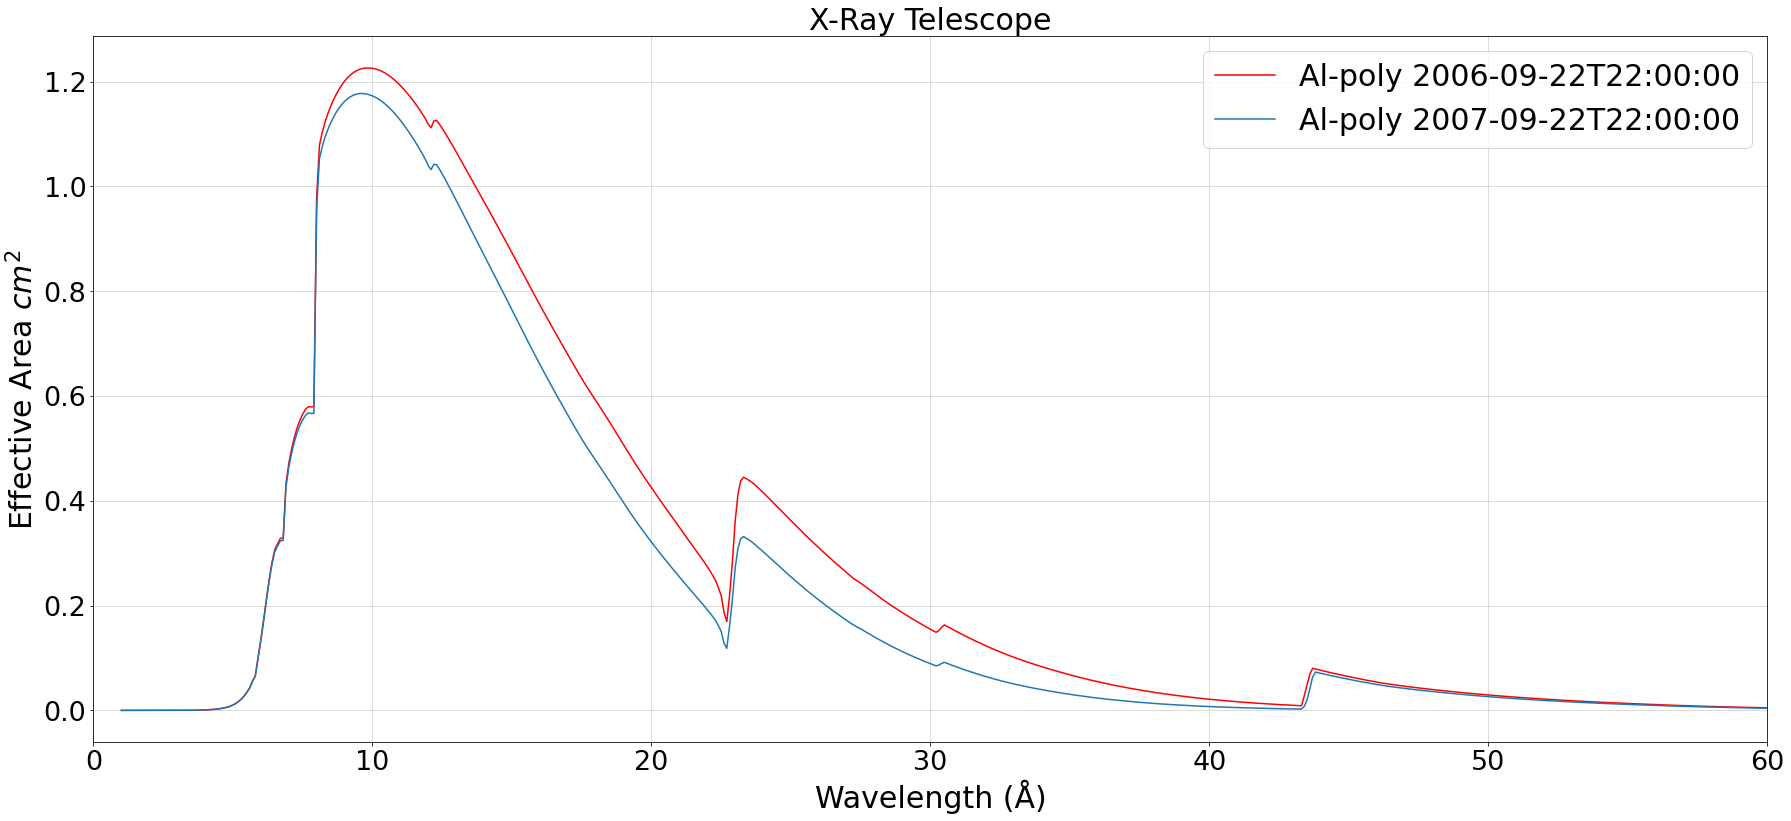

In [39]:
plot_effective_area()

[Montana State University Solar Physics site]:http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html
[Narukage et. al. (2011)]:https:doi.org/10.1007/s11207-010-9685-2

Plotting the effective area at launch date and a year after highlights the differences. This is due to the contamination layer thickness on the CCD. Information about the XRT CCD contaminant layer thickness calculation can be found at [Montana State University Solar Physics site]. In addition, more information can be found referencing [Narukage et. al. (2011)]
